In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Synthetic_SBA_Loans_more.csv')

In [3]:
df

,Applicant ID,Business Structure,Country,Location,NAICS,Business Ownership (1),Business Ownership (2),Business Ownership (3),Business Ownership (4),Business Ownership (5),...,Inventory Purchase,Real Estate Acquisition or Improvement,Business Acquisition or Buyout,Refinancing Existing Debt,Emergency Funds,Franchise Financing,Contract Financing,Licensing or Permits,Line of Credit Establishment,Eligibility
0,1,LLC,US,"Sterling Heights, MI",931190,100,0,0,0,0,...,False,False,True,False,False,True,True,True,False,[]
1,2,LLC,US,"Cleveland, OH",541511,69,31,0,0,0,...,True,False,True,False,False,False,False,False,False,[]
2,3,Franchise,US,"Springfield, MA",611420,100,0,0,0,0,...,False,True,False,True,True,True,True,True,False,[]
3,4,LLC,US,"New Orleans, LA",511110,100,0,0,0,0,...,False,True,True,True,True,False,False,False,True,[]
4,5,Franchise,US,"Bridgeport, CT",444130,100,0,0,0,0,...,True,True,False,False,True,False,False,True,True,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9999996,Sole Proprietorship,US,"Boise, ID",532111,51,49,0,0,0,...,False,True,False,True,True,True,False,True,True,[]
9999996,9999997,Sole Proprietorship,US,"Salt Lake City, UT",931280,100,0,0,0,0,...,True,True,True,True,True,False,False,False,True,[]
9999997,9999998,S Corporation (S-Corp),US,"Winston-Salem, NC",722511,71,29,0,0,0,...,False,True,False,False,False,True,False,False,True,[]
9999998,9999999,LLC,US,"Naperville, IL",711320,71,29,0,0,0,...,False,True,False,False,True,True,False,True,True,['504']


In [4]:
df['Eligibility'].value_counts()

Eligibility
[]                 7892867
['504']            1126362
['7(a)', '504']     595656
['Express']         354581
['8(a)']             30534
Name: count, dtype: int64

In [5]:
# Create new target column
df['Target'] = df['Eligibility'].apply(lambda x: 1 if '7(a)' in x else 0)

# Verify results
print(df[['Eligibility', 'Target']].head())

  Eligibility  Target
0          []       0
1          []       0
2          []       0
3          []       0
4          []       0


In [6]:
df = df.drop(columns=['Eligibility', 'Applicant ID', 'Location'])

In [7]:
df = df.rename(columns={'Target': 'Eligibility'})

In [8]:
df.head()

,Business Structure,Country,NAICS,Business Ownership (1),Business Ownership (2),Business Ownership (3),Business Ownership (4),Business Ownership (5),Personal Credit Score,Business Credit Score,...,Inventory Purchase,Real Estate Acquisition or Improvement,Business Acquisition or Buyout,Refinancing Existing Debt,Emergency Funds,Franchise Financing,Contract Financing,Licensing or Permits,Line of Credit Establishment,Eligibility
0,LLC,US,931190,100,0,0,0,0,470,149,...,False,False,True,False,False,True,True,True,False,0
1,LLC,US,541511,69,31,0,0,0,481,191,...,True,False,True,False,False,False,False,False,False,0
2,Franchise,US,611420,100,0,0,0,0,408,123,...,False,True,False,True,True,True,True,True,False,0
3,LLC,US,511110,100,0,0,0,0,809,123,...,False,True,True,True,True,False,False,False,True,0
4,Franchise,US,444130,100,0,0,0,0,703,145,...,True,True,False,False,True,False,False,True,True,0


In [9]:
df.drop(columns=['Country', 'NAICS', 'For Profit', 'Fast Approval'], inplace=True)

In [10]:
df = df[df["Eligibility"] == 1]

In [14]:
df.drop(columns=['Eligibility'], inplace=True)

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

Business Structure
['S Corporation (S-Corp)' 'Sole Proprietorship' 'LLC' 'Partnership'
 'Franchise']
7

Business Ownership (1)
[54 31 80 68 50]
58

Business Ownership (2)
[46 27 20 32 50]
32

Business Ownership (3)
[ 0 21 24 30 22]
15

Business Ownership (4)
[ 0 21 20 22 23]
7

Business Ownership (5)
[ 0 20]
2

Personal Credit Score
[709 693 761 700 749]
170

Business Credit Score
[189 162 185 164 181]
40

Annual Revenue (2 years ago)
[1752000 2522000 2203000 3106000 3211000]
4851

Annual Revenue (1 year ago)
[2685000 4399000 2065000 2541000 2429000]
4851

Annual Revenue (latest year)
[2787000 2798000 4767000  844000 3876000]
4851

Net Profit Margin
[44.75 24.77 60.56 48.88 36.04]
9871

Business Debt (2 years ago)
[ 640085  431651  236045 2353554 2162740]
522744

Business Debt (1 year ago)
[1244293  710867  836809  586560 1957956]
522487

Business Debt (latest year)
[ 872150  545730 1899189  322326 1154551]
512444

NOI (2 years ago)
[ 953726  599994  339904 2753658 1665309]
534462

NOI

In [16]:
df.dtypes

Business Structure                         object
Business Ownership (1)                      int64
Business Ownership (2)                      int64
Business Ownership (3)                      int64
Business Ownership (4)                      int64
Business Ownership (5)                      int64
Personal Credit Score                       int64
Business Credit Score                       int64
Annual Revenue (2 years ago)                int64
Annual Revenue (1 year ago)                 int64
Annual Revenue (latest year)                int64
Net Profit Margin                         float64
Business Debt (2 years ago)                 int64
Business Debt (1 year ago)                  int64
Business Debt (latest year)                 int64
NOI (2 years ago)                           int64
NOI (1 year ago)                            int64
NOI (latest year)                           int64
DSCR (2 years ago)                        float64
DSCR (1 year ago)                         float64


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset (assuming it's in a DataFrame called `df`)
# Define columns
categorical_columns = ["Business Structure"]
numerical_columns = [
    "Business Ownership (1)", "Business Ownership (2)", "Business Ownership (3)", 
    "Business Ownership (4)", "Business Ownership (5)", "Personal Credit Score", 
    "Business Credit Score", "Annual Revenue (2 years ago)", "Annual Revenue (1 year ago)",
    "Annual Revenue (latest year)", "Net Profit Margin", "Business Debt (2 years ago)",
    "Business Debt (1 year ago)", "Business Debt (latest year)", "NOI (2 years ago)",
    "NOI (1 year ago)", "NOI (latest year)", "DSCR (2 years ago)", "DSCR (1 year ago)",
    "DSCR (latest year)", "Industry Experience", "Managerial Experience", 
    "Years in Business", "Loan Amount"
]
boolean_columns = [
    "Collateral Availability", "Acquisition Request", "Working Capital", 
    "Business Expansion", "Equipment Purchase or Leasing", "Inventory Purchase",
    "Real Estate Acquisition or Improvement", "Business Acquisition or Buyout",
    "Refinancing Existing Debt", "Emergency Funds", "Franchise Financing",
    "Contract Financing", "Licensing or Permits", "Line of Credit Establishment"
]

# One-hot encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(drop="first"), categorical_columns),
        ("bool", 'passthrough', boolean_columns)
    ]
)

# Apply preprocessing
X = preprocessor.fit_transform(df)

In [18]:
from sklearn.mixture import GaussianMixture

# Define the number of clusters
n_clusters = 5  # You can tune this based on your dataset

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X)

# Predict cluster probabilities for each data point
cluster_probabilities = gmm.predict_proba(X)

# Assign the most likely cluster to each data point
df["Cluster"] = gmm.predict(X)

# Add probabilities as separate columns
for i in range(n_clusters):
    df[f"Cluster_{i}_Probability"] = cluster_probabilities[:, i]


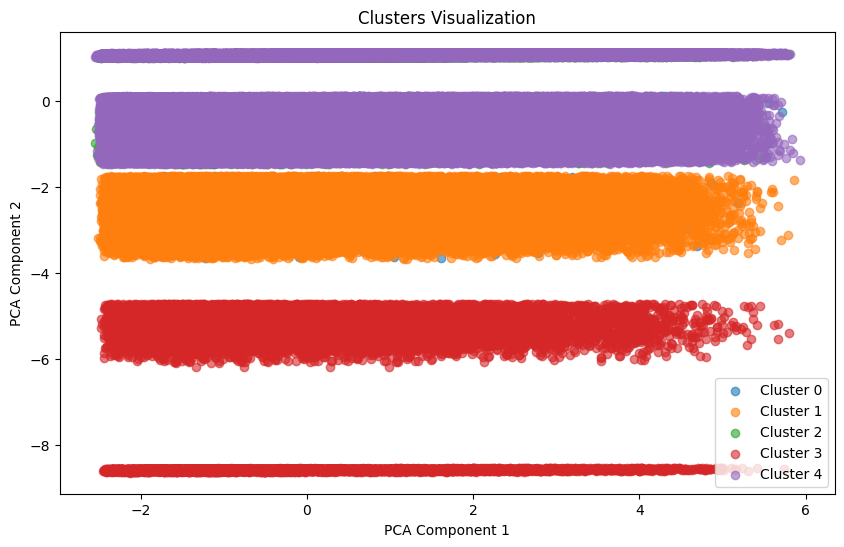

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters with their most likely assignments
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(
        X_pca[df["Cluster"] == cluster, 0], 
        X_pca[df["Cluster"] == cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.title("Clusters Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


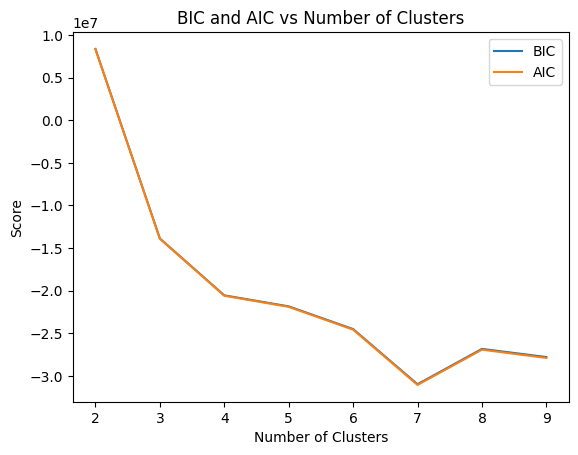

In [20]:
bic = []
aic = []
for n in range(2, 10):  # Test different numbers of clusters
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))

plt.plot(range(2, 10), bic, label="BIC")
plt.plot(range(2, 10), aic, label="AIC")
plt.legend()
plt.title("BIC and AIC vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()


In [21]:
# Refit the GMM with the optimal number of clusters
optimal_clusters = 5
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(X)

# Predict cluster probabilities and assignments
df["Cluster"] = gmm.predict(X)
cluster_probabilities = gmm.predict_proba(X)

# Add probabilities for each cluster as separate columns
for i in range(optimal_clusters):
    df[f"Cluster_{i}_Probability"] = cluster_probabilities[:, i]


In [23]:
numeric_columns = df.select_dtypes(include=["number"]).columns
cluster_summary = df.groupby("Cluster")[numeric_columns].mean()


In [25]:
cluster_summary

,Business Ownership (1),Business Ownership (2),Business Ownership (3),Business Ownership (4),Business Ownership (5),Personal Credit Score,Business Credit Score,Annual Revenue (2 years ago),Annual Revenue (1 year ago),Annual Revenue (latest year),...,Industry Experience,Managerial Experience,Years in Business,Loan Amount,Cluster,Cluster_0_Probability,Cluster_1_Probability,Cluster_2_Probability,Cluster_3_Probability,Cluster_4_Probability
Cluster,,,,,,,,,,,,,,,,,,,,,
0,83.756943,14.566291,1.676766,0.000000,0.000000,749.959111,175.361845,2.557374e+06,2.582887e+06,2.576146e+06,...,9.950674,9.999938,7.484143,1.491084e+06,0.0,1.0,0.000000e+00,0.000000,8.880041e-210,0.000000
1,46.794487,29.706645,23.498868,0.000000,0.000000,750.006670,175.497982,2.575620e+06,2.575090e+06,2.567966e+06,...,10.014472,9.999065,7.484420,1.470531e+06,1.0,0.0,1.000000e+00,0.000000,1.716284e-239,0.000000
2,86.309500,13.690500,0.000000,0.000000,0.000000,750.319298,175.515012,3.024377e+06,3.016346e+06,2.563399e+06,...,9.947435,10.000240,7.448412,1.459251e+06,2.0,0.0,1.311249e-17,0.967767,1.011585e-198,0.032233
3,28.624441,22.988273,21.234378,20.375956,6.776953,750.616396,175.513795,2.578259e+06,2.561610e+06,2.570756e+06,...,10.059430,9.961135,7.551640,1.469989e+06,3.0,0.0,0.000000e+00,0.000000,1.000000e+00,0.000000
4,86.516989,13.483011,0.000000,0.000000,0.000000,749.866743,175.416931,2.542393e+06,2.546474e+06,2.575173e+06,...,10.019301,9.991865,7.491570,1.473060e+06,4.0,0.0,1.367448e-18,0.002834,1.716291e-199,0.997166
